In [1]:
%pip install --upgrade nbformat plotly-express iso-639

     |████████████████████████████████| 77 kB 1.8 MB/s eta 0:00:011
Requirement already up-to-date: iso-639 in /home/tyler/.local/lib/python3.8/site-packages (0.4.5)
     |████████████████████████████████| 9.9 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 48.5 MB/s eta 0:00:01
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.4.0
    Uninstalling nbformat-5.4.0:
      Successfully uninstalled nbformat-5.4.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -U kaleido

     |████████████████████████████████| 79.9 MB 308 kB/s  eta 0:00:01     |█████████████████▍              | 43.5 MB 10.8 MB/s eta 0:00:04
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests
import json
from tqdm import tqdm
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import figure
from iso639 import languages

In [4]:
# "Prescreen" data, fill in missing keys with None
from bdb import Breakpoint
from requests import JSONDecodeError


df = None

with open('data/all_detailed_profiles.json', 'r') as file:
    response = file.read()
    all_detailed_users = json.loads(response)

    all_detailed_users = list(filter(None, all_detailed_users))
    
    df = pd.DataFrame(all_detailed_users)

In [5]:
location = df['location'].apply(pd.Series)
place = location['place'].apply(pd.Series)
location.drop('place',axis=1,inplace=True)
location[place.columns] = place
df[location.columns] = location
df.drop('location',axis=1,inplace=True)

In [6]:
df['kinks'] = df['kinks'].apply(lambda kinks: [kink['kink']['displayName'] for kink in kinks if kink['pleasureReceive'] == 1 or kink['pleasureGive'] == 1] if kinks else [])

In [7]:
privacySettings = df['privacySettings'].apply(pd.Series)
df[privacySettings.columns] = privacySettings
df.drop('privacySettings',axis=1,inplace=True)

In [8]:
bio = df['bio'].dropna().apply(pd.Series)
bio['hobbies'] = bio['hobbies'].apply(lambda hobbies: [hobby['interest'] for hobby in hobbies])
df[bio.columns] = bio
df.drop('bio',axis=1,inplace=True)

df['socialAccounts'] = df['socialAccounts'].dropna().apply(lambda socialAccounts: [acct for acct in socialAccounts.keys() if socialAccounts[acct] and acct != "__typename"] if socialAccounts else None)

In [9]:
df['events'] = df['events'].dropna().apply(lambda events: [event['event']['displayName'] for event in events])

In [10]:
df['sonas'] = df['sonas'].dropna().apply(lambda sonas: [sona['species']['displayName'] for sona in sonas])

In [11]:
df['groups'] = df['groups'].dropna().apply(lambda groups: [group['group']['displayName'] for group in groups])

In [12]:
df.drop(['images', 'profileImage', '__typename'], inplace=True, axis=1)

In [13]:
# df = df[df['countryCode'] == 'US']

In [14]:
pd.set_option('display.max_columns', None)
df

,uuid,displayName,relationType,isAdOptIn,isBirthday,age,bioAd,sonas,kinks,groups,events,roles,shareHash,type,distance,0,countryCode,latitude,longitude,place,region,startChat,viewAge,viewAd,viewKinks,viewProfile,blockAdults,blockMinors,biography,genders,languages,relationshipStatus,sexualOrientation,interests,hobbies,socialAccounts
0,eeb6a200-f288-4910-8d56-99b1cc0deca9,Quaznarx,None,False,False,25.0,None,[Dragon],[],"[Gaming, Dragon Furrs, Steam Furries, D&D Furs...",[],None,ljKLJkl,manual,0.0,NaN,US,40.7306,-73.9866,New York,New York,mutuals,public,public,public,public,False,False,He/Him\nMagenta dragon who loves outer space a...,[Male],[en],single,gay,None,"[Video Games, Board Games, Minecraft , Science...","[telegram, steam, discord]"
1,e12fda2f-f8c2-4801-8f7c-b0ae70a3cd14,AmytheBunny,None,False,False,19.0,None,[Bunny],[],"[Furry RP & Inflation, Furry Inflation, Gaming...",[],None,MQcBrXi,manual,0.0,NaN,US,40.7306,-73.9866,New York,New York,mutuals,public,public,public,public,False,False,Hello new people I’m Amy the bunny\nAnd I love...,[Male],[en],single,straight,None,"[Gaming, Cartoons, Chilling]",NaN
2,a281e1fb-7d04-441b-af03-444633293853,Ventus,None,False,False,24.0,None,[Red Panda/Panda Bear Mix],[],"[Twitter Furs [SFW], Artist Furs 🎨, Bear Furs,...",[],None,6YppDYP,manual,0.0,NaN,US,40.7306,-73.9866,New York,New York,public,public,public,public,public,False,True,Just a sleepy bear that’s looking to make some...,[Male],[en],relationship,gay,None,"[Anime, Video Games, Nintendo, Pokemon, Art, D...",NaN
3,56cd89a9-b87a-4e2c-bc33-67ba9e72d858,Lovestuck,None,False,False,19.0,None,"[Shadow wolf, Double-Bunny]",[],"[PokéFurrs, VR Furs, ✨Awesome Fursuits!✨, Poly...",[],None,P9qLmIn,manual,0.0,NaN,US,40.7306,-73.9866,New York,New York,public,public,public,public,public,False,True,"any/all, eng/fr, digital artist\n\nI'm not fro...",[Transgender Male],"[en, fr]",single,bisexual,None,"[Digital Art, Fursuits, Monsters, Kissing, ⛓ B...",[twitter]
4,78e999e4-e619-4fc5-91c8-116ca1cafddc,Snoop🌻,None,False,False,19.0,None,[],[],[],[],None,MAI8g1J,manual,0.0,NaN,US,40.7306,-73.9866,New York,New York,mutuals,public,public,public,public,False,False,None,None,None,None,None,None,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97991,93cfd67b-6375-4693-aab7-449f41bbb631,Israel,None,False,False,19.0,None,[],[],[],[],None,0j7Hu5L,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mutuals,public,public,public,public,False,False,None,None,None,None,None,None,[],[]
97992,52736605-6aff-4128-af28-ff8ca9b2eeff,Classified,None,False,False,22.0,None,[],[],[],[],None,pEbayvC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mutuals,public,public,public,public,False,False,Люблю у,None,None,None,None,None,[],[]
97993,67d54710-501a-431a-bb7b-94828436f1a0,Kafee,None,True,False,27.0,None,[],[],[Gaming],[],None,oSx6IBL,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mutuals,public,public,public,public,False,False,Will fill in shortly,[Male],"[en, es]",single,bisexual,None,[],[]
97994,d6cb8ee4-8d63-4886-970f-eff94b28a910,yeah,None,False,False,18.0,None,[],[],[],[],None,ZWWh9kS,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mutuals,public,public,public,public,False,False,"This is my lewd alt, if I liked you, it’s prob...",None,None,None,None,None,[],[]


In [15]:
def make_most_common(column, count, recursive):
    common_list = []
    if recursive:
        for items in df[column].dropna().tolist():
            if items is not None:
                common_list += items
    else:
        common_list = [item for item in df[column].dropna().tolist() if item is not None]

    return Counter(common_list).most_common(count)

In [63]:
import plotly.express as px

def make_bar_chart(most_common, title):
    most_common = list(reversed(most_common))



    # plt.figure(figsize=(7,10))
    # plt.barh([a[0] for a in most_common], [a[1] for a in most_common])
    # plt.xticks(rotation = 45)
    # plt.title(title)
    # plt.savefig("exports/" + title + ".png", facecolor='white', transparent=False, dpi=300, bbox_inches='tight', pad_inches=0.3)
    # plt.show()

    display(most_common)

    most_common = pd.DataFrame.from_records(list(dict(most_common).items()), columns=['y','x'])
    display(most_common)

    fig = px.bar(most_common, x='x', y='y', orientation='h')

    fig.update_layout(yaxis_title=None, xaxis_title=None)



    fig.show()
    

In [64]:
import plotly.express as px

def make_pie_chart(most_common, title):
    # plt.pie([a[1] for a in most_common], labels=[a[0] for a in most_common], autopct='%1.0f%%')
    # plt.title(title)
    # plt.savefig("exports/" + title + ".png", facecolor='white', transparent=False, dpi=300)
    # plt.show()
    # display(most_common)

    most_common = pd.DataFrame.from_records(list(dict(most_common).items()), columns=['item','count'])

    display(most_common)

    fig = px.pie(most_common, values='count', names='item', title=title)
    fig.show()

In [65]:
# Top fursonas
count = 30
most_common = make_most_common('sonas', count, True)
make_bar_chart(most_common, f"Top {count} fursonas")

[('Arctic Wolf', 522),
 ('Lynx', 529),
 ('Rabbit', 561),
 ('Wolf ', 581),
 ('Gray Wolf', 602),
 ('Spotted Hyena', 604),
 ('Bear', 638),
 ('Tiger', 733),
 ('Coyote', 743),
 ('Snow Leopard', 771),
 ('Fennec Fox', 786),
 ('German Shepherd', 825),
 ('Hyena', 838),
 ('Arctic Fox', 853),
 ('Otter', 863),
 ('Dog', 894),
 ('Lion', 919),
 ('Red Panda', 927),
 ('Raccoon', 934),
 ('Bunny', 935),
 ('Sergal', 939),
 ('Folf', 959),
 ('Red Fox', 1005),
 ('Deer', 1337),
 ('Protogen', 1392),
 ('Husky', 1863),
 ('Cat', 1889),
 ('Dragon', 2868),
 ('Wolf', 3569),
 ('Fox', 3894)]

,y,x
0,Arctic Wolf,522
1,Lynx,529
2,Rabbit,561
3,Wolf,581
4,Gray Wolf,602
5,Spotted Hyena,604
6,Bear,638
7,Tiger,733
8,Coyote,743
9,Snow Leopard,771


In [66]:
# Top states
count = 50
most_common = make_most_common('region', count, False)
make_bar_chart(most_common, f"Top states")

[('Oklahoma', 479),
 ('Wales', 481),
 ('Masovian Voivodeship', 490),
 ('Kentucky', 511),
 ('Alabama', 529),
 ('Alberta', 533),
 ('Quebec', 534),
 ('Nevada', 554),
 ('Saxony', 557),
 ('South Carolina', 569),
 ('Utah', 580),
 ('Scotland', 605),
 ('Moscow', 646),
 ('Buenos Aires', 661),
 ('Maryland', 693),
 ('British Columbia', 697),
 ('Minnesota', 699),
 ('Hesse', 735),
 ('New Jersey', 741),
 ('Tennessee', 760),
 ('Victoria', 768),
 ('Missouri', 774),
 ('Massachusetts', 780),
 ('Indiana', 823),
 ('Oregon', 824),
 ('Wisconsin', 824),
 ('Queensland', 828),
 ('Arizona', 917),
 ('São Paulo', 971),
 ('New South Wales', 977),
 ('Lower Saxony', 1056),
 ('Baden-Württemberg', 1067),
 ('Virginia', 1075),
 ('Michigan', 1160),
 ('Colorado', 1174),
 ('Georgia', 1196),
 ('North Carolina', 1223),
 ('Ontario', 1266),
 ('Illinois', 1287),
 ('Bavaria', 1326),
 ('Ohio', 1429),
 ('New York', 1605),
 ('Pennsylvania', 1607),
 ('Washington', 1999),
 ('North Rhine-Westphalia', 2100),
 ('', 2392),
 ('Florida', 2

,y,x
0,Oklahoma,479
1,Wales,481
2,Masovian Voivodeship,490
3,Kentucky,511
4,Alabama,529
5,Alberta,533
6,Quebec,534
7,Nevada,554
8,Saxony,557
9,South Carolina,569


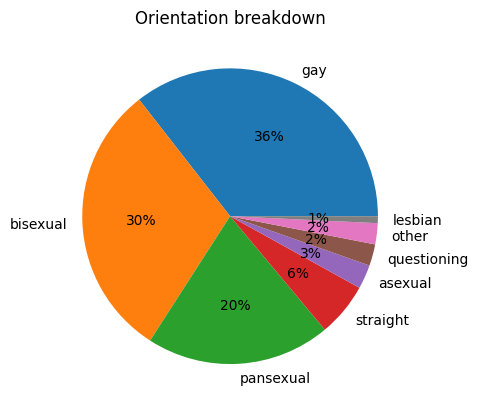

[('gay', 26092),
 ('bisexual', 22283),
 ('pansexual', 14808),
 ('straight', 4313),
 ('asexual', 1932),
 ('questioning', 1729),
 ('other', 1693),
 ('lesbian', 553)]

,item,count
0,gay,26092
1,bisexual,22283
2,pansexual,14808
3,straight,4313
4,asexual,1932
5,questioning,1729
6,other,1693
7,lesbian,553


In [34]:
# Top orientations
most_common = make_most_common('sexualOrientation', 10, False)
make_pie_chart(most_common, "Orientation breakdown")

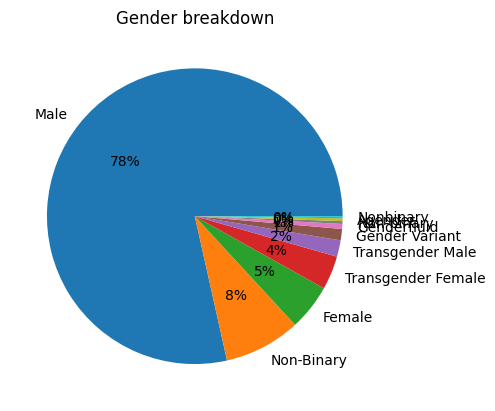

In [21]:
# Top genders
most_common = make_most_common('genders', 10, True);
make_pie_chart(most_common, "Gender breakdown")

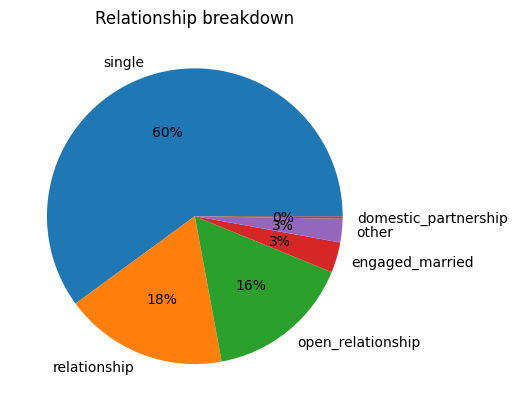

In [22]:
# Top Relationships
most_common = make_most_common('relationshipStatus', 10, False);
make_pie_chart(most_common, "Relationship breakdown")

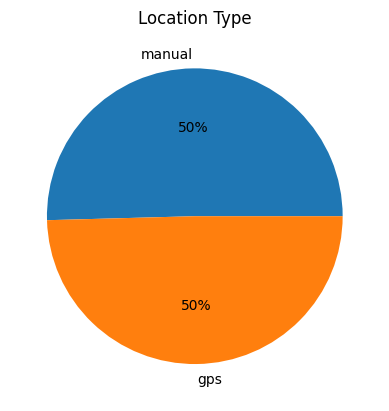

In [23]:
most_common = make_most_common('type', 10, False);
make_pie_chart(most_common, "Location Type")

/tmp/ipykernel_24615/561859007.py:7: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  plt.savefig("exports/" + title + ".png", facecolor='white', transparent=False, dpi=300, bbox_inches='tight', pad_inches=0.3)
/tmp/ipykernel_24615/561859007.py:7: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  plt.savefig("exports/" + title + ".png", facecolor='white', transparent=False, dpi=300, bbox_inches='tight', pad_inches=0.3)
/home/tyler/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/tyler/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


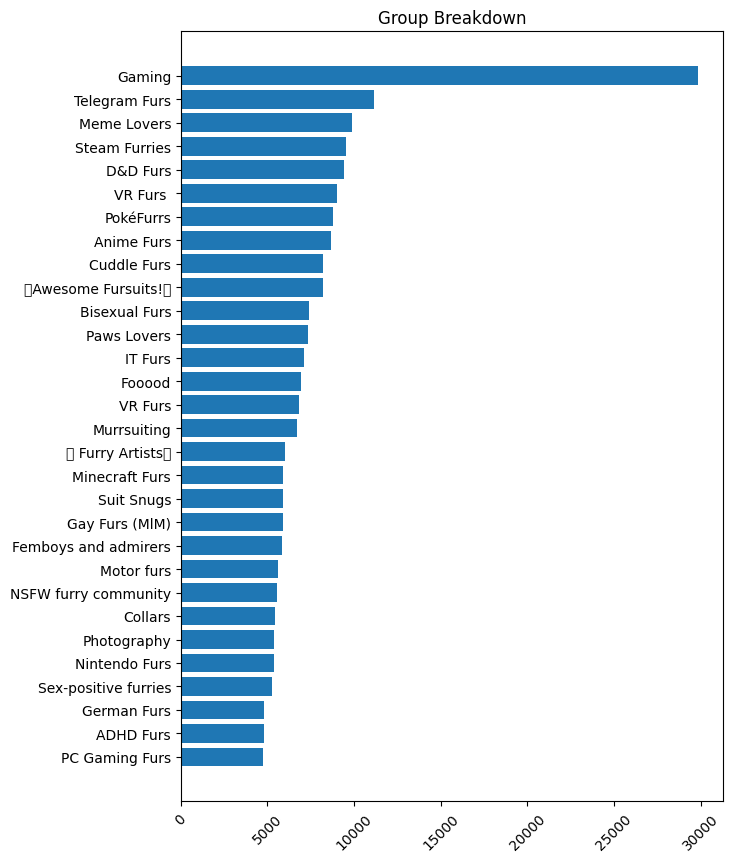

In [24]:
most_common = make_most_common('groups', 30, True)
make_bar_chart(most_common, "Group Breakdown")

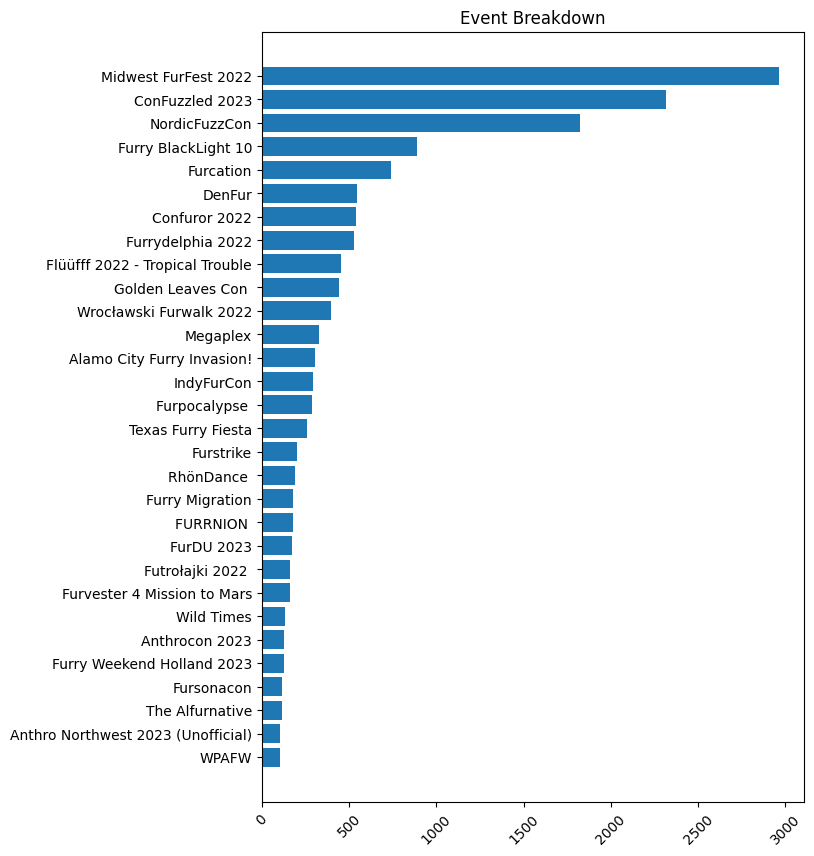

In [25]:
most_common = make_most_common('events', 30, True)
make_bar_chart(most_common, "Event Breakdown")

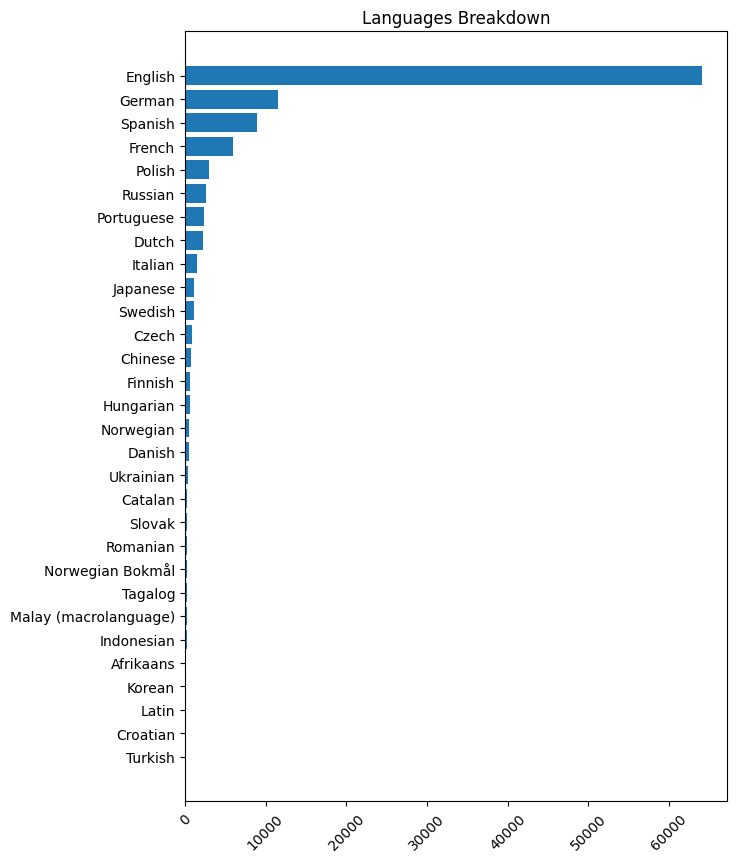

In [26]:
most_common = make_most_common('languages', 30, True)
most_common = [(languages.get(alpha2=lang[0]).name, lang[1]) for lang in most_common]
make_bar_chart(most_common, "Languages Breakdown")

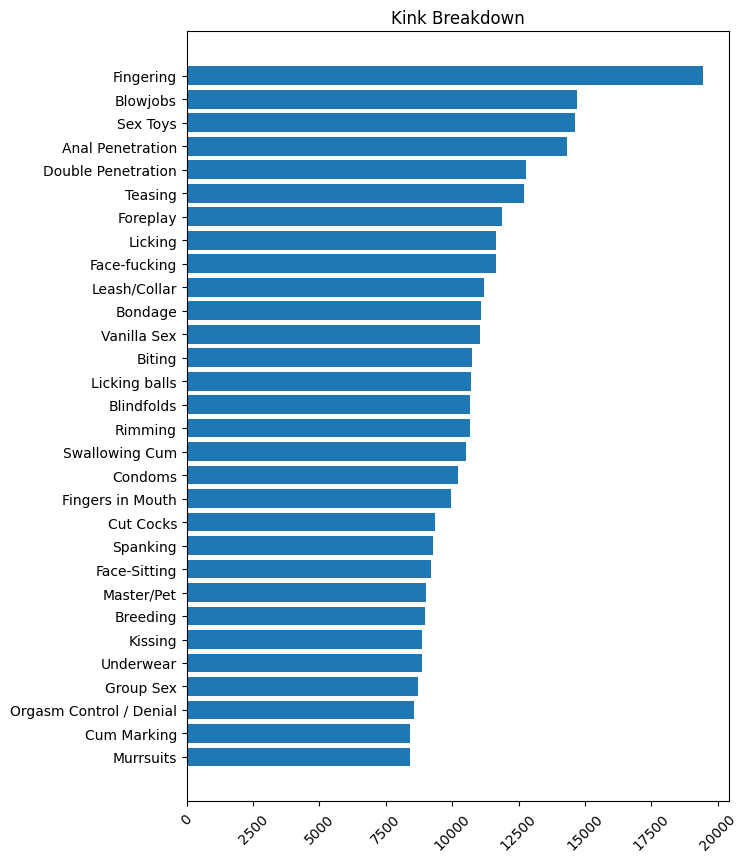

In [27]:
most_common = make_most_common('kinks', 30, True)
make_bar_chart(most_common, "Kink Breakdown")

In [28]:
state_codes = {
    'Alaska': 'AK',
    'Alabama': 'AL',
    'Arkansas': 'AR',
    'Arizona': 'AZ',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Iowa': 'IA',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Massachusetts': 'MA',
    'Maryland': 'MD',
    'Maine': 'ME',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Missouri': 'MO',
    'Mississippi': 'MS',
    'Montana': 'MT',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Nebraska': 'NE',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'Nevada': 'NV',
    'New York': 'NY',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Virginia': 'VA',
    'Vermont': 'VT',
    'Washington': 'WA',
    'Wisconsin': 'WI',
    'West Virginia': 'WV',
    'Wyoming': 'WY'
}

def top_per_state(column, iterate):
    column_per_state = {}

    states = list(set(df['region'].tolist()))

    for state in states:
        people_in_state = df[df['region'] == state]

        column_list = []
        if iterate:
            for profile_items in people_in_state[column].tolist():
                column_list += profile_items
        else:
            column_list = people_in_state[column].tolist()

        if column_list:
            most_common = Counter(column_list).most_common(1)[0]

            column_per_state[state] = most_common


    column_per_state = {'state': [state_codes[state] for state in column_per_state if state in state_codes], column: [column_per_state[state][0] for state in column_per_state if state in state_codes]}
    return pd.DataFrame(column_per_state)

In [29]:
country_codes = {
  "AF": "Afghanistan",
  "AX": "Åland Islands",
  "AL": "Albania",
  "DZ": "Algeria",
  "AS": "American Samoa",
  "AD": "AndorrA",
  "AO": "Angola",
  "AI": "Anguilla",
  "AQ": "Antarctica",
  "AG": "Antigua and Barbuda",
  "AR": "Argentina",
  "AM": "Armenia",
  "AW": "Aruba",
  "AU": "Australia",
  "AT": "Austria",
  "AZ": "Azerbaijan",
  "BS": "Bahamas",
  "BH": "Bahrain",
  "BD": "Bangladesh",
  "BB": "Barbados",
  "BY": "Belarus",
  "BE": "Belgium",
  "BZ": "Belize",
  "BJ": "Benin",
  "BM": "Bermuda",
  "BT": "Bhutan",
  "BO": "Bolivia",
  "BA": "Bosnia and Herzegovina",
  "BW": "Botswana",
  "BV": "Bouvet Island",
  "BR": "Brazil",
  "IO": "British Indian Ocean Territory",
  "BN": "Brunei Darussalam",
  "BG": "Bulgaria",
  "BF": "Burkina Faso",
  "BI": "Burundi",
  "KH": "Cambodia",
  "CM": "Cameroon",
  "CA": "Canada",
  "CV": "Cape Verde",
  "KY": "Cayman Islands",
  "CF": "Central African Republic",
  "TD": "Chad",
  "CL": "Chile",
  "CN": "China",
  "CX": "Christmas Island",
  "CC": "Cocos (Keeling) Islands",
  "CO": "Colombia",
  "KM": "Comoros",
  "CG": "Congo",
  "CD": "Congo, The Democratic Republic of the",
  "CK": "Cook Islands",
  "CR": "Costa Rica",
  "CI": "Cote D'Ivoire",
  "HR": "Croatia",
  "CU": "Cuba",
  "CY": "Cyprus",
  "CZ": "Czech Republic",
  "DK": "Denmark",
  "DJ": "Djibouti",
  "DM": "Dominica",
  "DO": "Dominican Republic",
  "EC": "Ecuador",
  "EG": "Egypt",
  "SV": "El Salvador",
  "GQ": "Equatorial Guinea",
  "ER": "Eritrea",
  "EE": "Estonia",
  "ET": "Ethiopia",
  "FK": "Falkland Islands (Malvinas)",
  "FO": "Faroe Islands",
  "FJ": "Fiji",
  "FI": "Finland",
  "FR": "France",
  "GF": "French Guiana",
  "PF": "French Polynesia",
  "TF": "French Southern Territories",
  "GA": "Gabon",
  "GM": "Gambia",
  "GE": "Georgia",
  "DE": "Germany",
  "GH": "Ghana",
  "GI": "Gibraltar",
  "GR": "Greece",
  "GL": "Greenland",
  "GD": "Grenada",
  "GP": "Guadeloupe",
  "GU": "Guam",
  "GT": "Guatemala",
  "GG": "Guernsey",
  "GN": "Guinea",
  "GW": "Guinea-Bissau",
  "GY": "Guyana",
  "HT": "Haiti",
  "HM": "Heard Island and Mcdonald Islands",
  "VA": "Holy See (Vatican City State)",
  "HN": "Honduras",
  "HK": "Hong Kong",
  "HU": "Hungary",
  "IS": "Iceland",
  "IN": "India",
  "ID": "Indonesia",
  "IR": "Iran, Islamic Republic Of",
  "IQ": "Iraq",
  "IE": "Ireland",
  "IM": "Isle of Man",
  "IL": "Israel",
  "IT": "Italy",
  "JM": "Jamaica",
  "JP": "Japan",
  "JE": "Jersey",
  "JO": "Jordan",
  "KZ": "Kazakhstan",
  "KE": "Kenya",
  "KI": "Kiribati",
  "KP": "Korea, Democratic People'S Republic of",
  "KR": "Korea, Republic of",
  "KW": "Kuwait",
  "KG": "Kyrgyzstan",
  "LA": "Lao People'S Democratic Republic",
  "LV": "Latvia",
  "LB": "Lebanon",
  "LS": "Lesotho",
  "LR": "Liberia",
  "LY": "Libyan Arab Jamahiriya",
  "LI": "Liechtenstein",
  "LT": "Lithuania",
  "LU": "Luxembourg",
  "MO": "Macao",
  "MK": "Macedonia, The Former Yugoslav Republic of",
  "MG": "Madagascar",
  "MW": "Malawi",
  "MY": "Malaysia",
  "MV": "Maldives",
  "ML": "Mali",
  "MT": "Malta",
  "MH": "Marshall Islands",
  "MQ": "Martinique",
  "MR": "Mauritania",
  "MU": "Mauritius",
  "YT": "Mayotte",
  "MX": "Mexico",
  "FM": "Micronesia, Federated States of",
  "MD": "Moldova, Republic of",
  "MC": "Monaco",
  "MN": "Mongolia",
  "MS": "Montserrat",
  "MA": "Morocco",
  "MZ": "Mozambique",
  "MM": "Myanmar",
  "NA": "Namibia",
  "NR": "Nauru",
  "NP": "Nepal",
  "NL": "Netherlands",
  "AN": "Netherlands Antilles",
  "NC": "New Caledonia",
  "NZ": "New Zealand",
  "NI": "Nicaragua",
  "NE": "Niger",
  "NG": "Nigeria",
  "NU": "Niue",
  "NF": "Norfolk Island",
  "MP": "Northern Mariana Islands",
  "NO": "Norway",
  "OM": "Oman",
  "PK": "Pakistan",
  "PW": "Palau",
  "PS": "Palestinian Territory, Occupied",
  "PA": "Panama",
  "PG": "Papua New Guinea",
  "PY": "Paraguay",
  "PE": "Peru",
  "PH": "Philippines",
  "PN": "Pitcairn",
  "PL": "Poland",
  "PT": "Portugal",
  "PR": "Puerto Rico",
  "QA": "Qatar",
  "RE": "Reunion",
  "RO": "Romania",
  "RU": "Russian Federation",
  "RW": "RWANDA",
  "SH": "Saint Helena",
  "KN": "Saint Kitts and Nevis",
  "LC": "Saint Lucia",
  "PM": "Saint Pierre and Miquelon",
  "VC": "Saint Vincent and the Grenadines",
  "WS": "Samoa",
  "SM": "San Marino",
  "ST": "Sao Tome and Principe",
  "SA": "Saudi Arabia",
  "SN": "Senegal",
  "CS": "Serbia and Montenegro",
  "SC": "Seychelles",
  "SL": "Sierra Leone",
  "SG": "Singapore",
  "SK": "Slovakia",
  "SI": "Slovenia",
  "SB": "Solomon Islands",
  "SO": "Somalia",
  "ZA": "South Africa",
  "GS": "South Georgia and the South Sandwich Islands",
  "ES": "Spain",
  "LK": "Sri Lanka",
  "SD": "Sudan",
  "SR": "Suriname",
  "SJ": "Svalbard and Jan Mayen",
  "SZ": "Swaziland",
  "SE": "Sweden",
  "CH": "Switzerland",
  "SY": "Syrian Arab Republic",
  "TW": "Taiwan, Province of China",
  "TJ": "Tajikistan",
  "TZ": "Tanzania, United Republic of",
  "TH": "Thailand",
  "TL": "Timor-Leste",
  "TG": "Togo",
  "TK": "Tokelau",
  "TO": "Tonga",
  "TT": "Trinidad and Tobago",
  "TN": "Tunisia",
  "TR": "Turkey",
  "TM": "Turkmenistan",
  "TC": "Turks and Caicos Islands",
  "TV": "Tuvalu",
  "UG": "Uganda",
  "UA": "Ukraine",
  "AE": "United Arab Emirates",
  "GB": "United Kingdom",
  "US": "United States",
  "UM": "United States Minor Outlying Islands",
  "UY": "Uruguay",
  "UZ": "Uzbekistan",
  "VU": "Vanuatu",
  "VE": "Venezuela",
  "VN": "Viet Nam",
  "VG": "Virgin Islands, British",
  "VI": "Virgin Islands, U.S.",
  "WF": "Wallis and Futuna",
  "EH": "Western Sahara",
  "YE": "Yemen",
  "ZM": "Zambia",
  "ZW": "Zimbabwe"
}

def top_per_country(column, iterate):
    column_per_country = {}

    countries = list(set(df['countryCode'].tolist()))

    for country in countries:
        people_in_country = df[df['countryCode'] == country]

        column_list = []
        if iterate:
            for profile_items in people_in_country[column].tolist():
                column_list += profile_items
        else:
            column_list = people_in_country[column].tolist()

        if column_list:
            most_common = Counter(column_list).most_common(1)[0]

            column_per_country[country] = most_common


    column_per_country = {'country': [country_codes[country] for country in column_per_country if country in country_codes], column: [column_per_country[country][0] for country in column_per_country if country in country_codes]}
    return pd.DataFrame(column_per_country)

In [30]:
def plot_map(thing_per_state, title, column_name, type="USA"):
    states = type == "USA"

    fig = px.choropleth(thing_per_state,
    title=title,
    locations='state' if states else 'country', 
    locationmode="USA-states" if states else "country names", 
    scope="usa" if states else "world",
    color=column_name,
    color_continuous_scale="Viridis_r"
    )
    fig.show()
    fig.write_image(file="exports/" + title + ".png", format='png', scale=6, width=1080, height=540)
    
    if not states:
        fig.write_html("exports/test.html")

In [31]:
# How many I have per state

column_per_state = {}

states = list(set(df['region'].tolist()))

for state in states:
    people_in_state = df[df['region'] == state]
    column_per_state[state] = people_in_state.shape[0]



column_per_state = {'state': [state_codes[state] for state in column_per_state if state in state_codes], 'count': [column_per_state[state] for state in column_per_state if state in state_codes]}
count_per_state = pd.DataFrame(column_per_state)


plot_map(count_per_state, 'Count per state', 'count')

In [32]:
# How many I have per country

column_per_country = {}

countries = list(set(df['countryCode'].tolist()))

for country in countries:
    people_in_country = df[df['countryCode'] == country]
    column_per_country[country] = people_in_country.shape[0]


column_per_country = {'country': [country_codes[country] for country in column_per_country if country in country_codes], 'count': [column_per_country[country] for country in column_per_country if country in country_codes]}
count_per_country = pd.DataFrame(column_per_country)
plot_map(count_per_country, 'Count per country', 'count', type='world')

In [33]:
plot_map(top_per_state('sonas', True), 'Most popular fursona per state', 'sonas')

In [34]:
plot_map(top_per_country('sonas', True), 'Most popular fursona per country', 'sonas', type="world")

In [35]:
plot_map(top_per_state('events', True), 'Most popular event per state', 'events')

In [36]:
plot_map(top_per_state('groups', True), 'Most popular groups per state', 'groups')

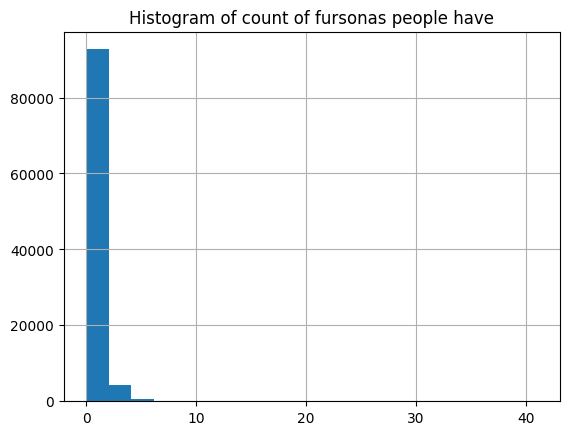

In [37]:
df['sonas'].str.len().hist(bins=20)
plt.title("Histogram of count of fursonas people have")
plt.savefig("exports/Histogram of count of fursonas people have.png", facecolor='white', transparent=False, dpi=300)

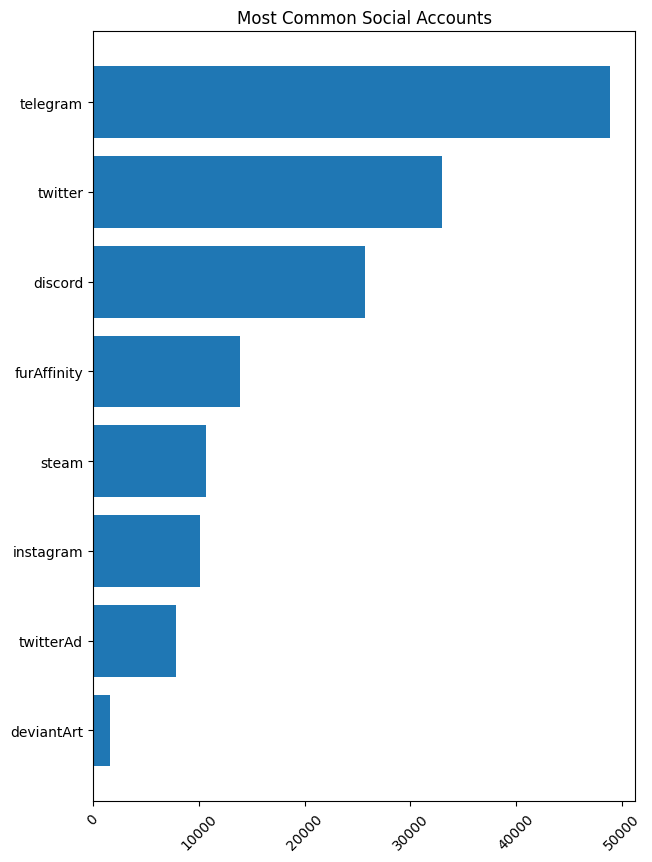

In [38]:
most_common = make_most_common('socialAccounts', 30, True)
make_bar_chart(most_common, "Most Common Social Accounts")

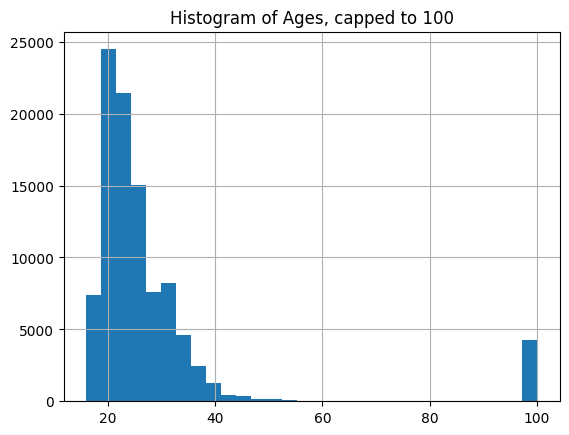

In [39]:
df['age'].apply(lambda age: age if age < 100 else 100).hist(bins=30)
plt.title("Histogram of Ages, capped to 100")
plt.savefig("exports/Histogram of Ages, capped to 100.png", facecolor='white', transparent=False, dpi=300)

In [40]:
plot_map(top_per_state('age', False), 'Most popular age per state', 'age')

In [41]:
plot_map(top_per_country('age', False), 'Most popular age per country', 'age', type="world")